In [1]:
%matplotlib ipympl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import genlaguerre    #genlaguerre(n, alpha)
import matplotlib as mpl

from matplotlib.lines import Line2D
import ipywidgets as widgets
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage

In [2]:
W = 1.5 #um(10**-6m)

def Factorial(n):
    f=1
    for i in range(1,n+1,1):
        f*=i 
    return f

def Laguerre(rho,l,p):
    l = np.abs(l)
    L = 0
    for m in range(p+1):
        L += (-1)**m * Factorial(l+p) / (Factorial(p-m)*Factorial(l+m)*Factorial(m)) * (2*(rho/W)**2)**m
    return L

def f(rho,l,p):
    l = np.abs(l)
    f = np.sqrt((Factorial(p)*2)/(np.pi*Factorial(l+p))) * np.exp(-(rho/W)**2) * (np.sqrt(2)*rho/W)**l * Laguerre(rho,l,p)
    return f 
    
def u(phi,rho,l,p):
    u = f(rho,l,p) * np.exp(complex(0,1)*l*phi)
    return u

def ux(phi,rho,l1,l2,p,beta,alpha):
    ux = (1*np.cos(beta/2)*u(phi,rho,l1,p) +1*np.exp(complex(0,1)*alpha)*np.sin(beta/2)*u(phi,rho,l2,p) )/np.sqrt(2)
    return ux

def uy(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha):
    uy = complex(0,1)*( sigma1*np.cos(beta/2)*u(phi,rho,l1,p)  +sigma2*np.exp(complex(0,1)*alpha)*np.sin(beta/2)*u(phi,rho,l2,p) )/np.sqrt(2)  
    return uy

def uintensity(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha):
    uin = np.sqrt( np.abs(ux(phi,rho,l1,l2,p,beta,alpha))**2 + np.abs(uy(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha))**2 )
    return uin


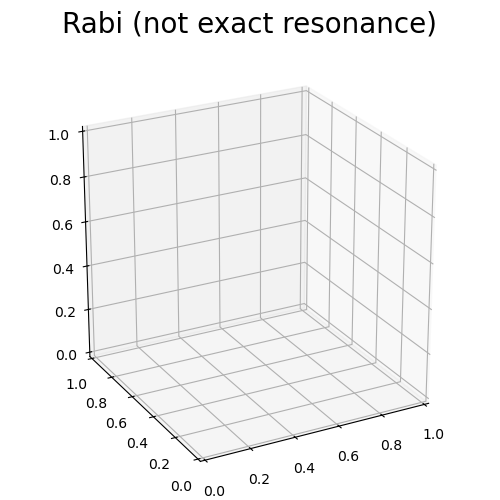

Output()

In [3]:
fig, ax = plt.subplots(figsize=(5,5))
fig.delaxes(ax)
ax3D = fig.add_subplot(projection='3d')

deltaomega = 0
omegaR = 1
omega=np.sqrt(omegaR**2+deltaomega**2)
t = widgets.FloatSlider(value=0, min=0., max=2*np.pi/omega*5, step=1/50 ,description='t:')

ax3D.set_aspect('equal', adjustable='box')

U, V = np.mgrid[0:2*np.pi:30j, 0:np.pi:30j]
wx = np.cos(U) * np.sin(V)
wy = np.sin(U) * np.sin(V)
wz = np.cos(V)

o = np.linspace(0,2*np.pi,30, endpoint=True)
c = np.linspace(0, np.pi,15, endpoint=True)

def need(t):
    ax3D.cla()

    ax3D.plot_wireframe(wx, wy, wz, rcount=16, ccount=13, color=[0.154, 0.8059, 0.0394,0.15])
    ax3D.plot_surface(wx, wy, wz, rcount=16, ccount=13, color=[0.154, 0.8059, 0.0394,0.05])
    
    x = omegaR/(omega**2) * deltaomega * 2*np.sin(omega*t/2)**2
    y = omegaR/omega * np.sin(omega*t)
    z = np.sin(omega*t/2)**2 - np.cos(omega*t/2)**2 - 2*deltaomega**2/omega**2*np.sin(omega*t/2)**2
    print(np.sqrt(np.abs(x)**2+np.abs(y)**2+np.abs(z)**2))
    ax3D.quiver(0, 0, 0, x, y, z, color=[0.547, 0.152, 0.996])
    ax3D.quiver(0, 0, 0, 0.3, 0, 0, color='k')
    ax3D.quiver(0, 0, 0, 0, 0.3, 0, color='k')
    ax3D.quiver(0, 0, 0, 0, 0, 0.3, color='k')

    # ax3D.plot(np.sin(beta)*np.cos(o), np.sin(beta)*np.sin(o), np.cos(beta)+(o*0) , linestyle='dotted', color=[0.547, 0.152, 0.996, 0.8])
    # ax3D.plot(np.sin(c)*np.cos(alpha), np.sin(c)*np.sin(alpha), np.cos(c) , linestyle='dotted', color=[0.547, 0.152, 0.996, 0.8])

    
    ax3D.text2D(0.05, 0.95, '$\Omega_R=$'+str(format(omegaR,'.2f'))+'$,  \delta\omega=$'+str(format(deltaomega,'.2f'))+'$,  \Omega=$'+str(format(omega,'.2f'))+'\nt='+str(format(t/np.pi,'.2f'))+'$\pi$', transform=ax3D.transAxes)
    ax3D.text(0.3, 0, 0, "$\hat{x}$", color='k')
    ax3D.text(0, 0.3, 0, "$\hat{y}$", color='k')
    ax3D.text(0, 0, 0.3, "$\hat{z}$", color='k')
    # ax3D.text(0, 0, 1.2, "|$\sigma\,="+str(sigma1)+",\,l\,$⟩", color='k',fontsize=9)
    # ax3D.text(0, 0, -1.3, "|$\sigma^{'}\,="+str(sigma2)+",\,l^{'}\,$⟩", color='k',fontsize=9)
    ax3D.set_xlabel('x')
    ax3D.set_ylabel('y')
    ax3D.set_zlabel('z')
    ax3D.set_xlim(-1,1)
    ax3D.set_ylim(-1,1)
    ax3D.set_zlim(-1,1)
    x_major_locator=MultipleLocator(0.5)
    y_major_locator=MultipleLocator(0.5)
    z_major_locator=MultipleLocator(0.5)
    ax3D.xaxis.set_major_locator(x_major_locator)
    ax3D.yaxis.set_major_locator(y_major_locator)
    ax3D.zaxis.set_major_locator(z_major_locator)



plt.suptitle('Rabi (not exact resonance)' ,fontsize=20)
ax3D.view_init(24, -118, 0)                 #ax.view_init(elev, azim, roll)
plt.tight_layout(pad=1)
plt.show()

out = widgets.interactive_output(need, {'t':t})
ui = widgets.VBox([widgets.Label('parameter:'), widgets.HBox([t]) ])
display(ui , out )



# C:\Users\USER\Documents\大二資料\code              #存檔位置
# ffmpeg –r 20 –i direction_%01d.png direction.avi  #輸出指令